# Vector_Representations_of_Words

* 손고리즘ML : 파트 4 - DML-PKG
* 김무성

이 자료는  
* 구글의 텐서플로우 기본 튜토리얼[1]과
    - [1] Vector Representations of Words - https://www.tensorflow.org/versions/r0.7/tutorials/word2vec/index.html#vector-representations-of-words
* udacity의 deep learning 코스 예제[2]를 바탕으로 한다.
    - [2] Assignment 5: Word2Vec and CBOW - https://github.com/tensorflow/tensorflow/blob/master/tensorflow/examples/udacity/5_word2vec.ipynb

# Contents
* Highlights
* Motivation: Why Learn Word Embeddings?
* Scaling up with Noise-Contrastive Training
* The Skip-gram Model
* Building the Graph
* Training the Model
* Visualizing the Learned Embeddings
* Evaluating Embeddings: Analogical Reasoning
* Optimizing the Implementation

<img src="figures/cat1.png" width=600 />
<img src="figures/cat2.png" width=600 />
<img src="figures/we.png" width=600 />
<img src="figures/w2v.png" width=600 />
<img src="figures/tsen.png" width=600 />

# Highlights

This tutorial is meant to highlight the interesting, substantive parts of building a word2vec model in TensorFlow.
* We start by giving the motivation for <font color="red">why we would want to represent words as vectors</font>.
* We look at the <font color="red">intuition behind the model</font> and <font color="blue">how it is trained</font> (with a splash of math for good measure).
* We also show a simple implementation of the model in TensorFlow.
* Finally, we look at ways to make the naive version scale better.

#### code
* tensorflow/examples/tutorials/word2vec/word2vec_basic.py
    - https://www.tensorflow.org/code/tensorflow/examples/tutorials/word2vec/word2vec_basic.py
* tensorflow/models/embedding/word2vec.py 
    - https://www.tensorflow.org/code/tensorflow/models/embedding/word2vec.py 
* tensorflow/models/embedding/word2vec_optimized.py
    - https://www.tensorflow.org/code/tensorflow/models/embedding/word2vec_optimized.py
*  Assignment 5: Word2Vec and CBOW
    - https://github.com/tensorflow/tensorflow/blob/master/tensorflow/examples/udacity/5_word2vec.ipynb

#### data
* Text8 
    - http://mattmahoney.net/dc/textdata
    - The test data for the Large Text Compression Benchmark is the first 109 bytes of the English Wikipedia dump on Mar. 3, 2006
* Analogical Reasoning task 
    - https://word2vec.googlecode.com/svn/trunk/questions-words.txt

# Motivation: Why Learn Word Embeddings?

* Vector space models (VSMs)
* Distributional Hypothesis
* Latent Semantic Analysis
* neural probabilistic language models
* Word2Vec
    - Continuous Bag-of-Words model (CBOW)
    - Skip-Gram model

<img src="https://www.tensorflow.org/versions/r0.7/images/audio-image-text.png" width=600 />

### Vector space models (VSMs)

<img src="http://blog.christianperone.com/wp-content/uploads/2013/09/vector_space.png" width=600 />

### Distributional Hypothesis

<img src="http://image.slidesharecdn.com/introductiontodistributionalsemantics-140625074008-phpapp01/95/introduction-to-distributional-semantics-10-638.jpg?cb=1403682061" width=600 />

### Latent Semantic Analysis

<img src="https://technowiki.files.wordpress.com/2011/08/xygraph2.png" width=600 />

### neural probabilistic language models

<img src="http://image.slidesharecdn.com/ldatutorial-150317223352-conversion-gate01/95/topic-modeling-for-learning-analytics-researchers-lak15-tutorial-66-638.jpg?cb=1426894536" width=600 />

### Word2Vec
* Continuous Bag-of-Words model (CBOW)
* Skip-Gram model

<img src="http://cdn-ak.f.st-hatena.com/images/fotolife/T/TJO/20140619/20140619150536.png" width=600 />

#### Continuous Bag-of-Words model (CBOW)

<img src="http://image.slidesharecdn.com/wordembedings-whythehype-151203065649-lva1-app6891/95/word-embeddings-why-the-hype-16-638.jpg?cb=1449126428" width=600 />

#### Skip-Gram model

<img src="http://image.slidesharecdn.com/word2vecslidejplee-151125062502-lva1-app6891/95/word2vec-slidelab-seminar-23-638.jpg?cb=1449024831" with=600 />

<img src="https://www.lucypark.kr/courses/2015-ba/images/cbow-skip.png" width=600 />

# Scaling up with Noise-Contrastive Training

* maximum likelihood (ML)
* softmax function
* Monte Carlo average
* Negative Sampling
* noise-contrastive estimation (NCE)

### maximum likelihood (ML)

<img src="http://statgen.iop.kcl.ac.uk/media/ml1.gif" width=600 />

### softmax function

<img src="http://images.slideplayer.com/11/3277991/slides/slide_57.jpg" width=600 />

<img src="https://qph.is.quoracdn.net/main-qimg-9e2d012ef7cb8b29d2bed14d2975c986?convert_to_webp=true" />

<img src="https://www.evernote.com/shard/s142/sh/d8bfa5b8-9bb6-4651-947b-2d5623a75723/a14f4e5fb17aaa63/res/801140b0-7303-40fc-bd34-8c99110de341.png?resizeSmall&width=832" width=600 />

<img src="https://www.evernote.com/shard/s142/sh/d8bfa5b8-9bb6-4651-947b-2d5623a75723/a14f4e5fb17aaa63/res/144a4f6b-1f9b-43a5-a039-5a8990479b16.png?resizeSmall&width=832" width=600 />

<img src="https://www.evernote.com/shard/s142/sh/d8bfa5b8-9bb6-4651-947b-2d5623a75723/a14f4e5fb17aaa63/res/f8608f76-005a-4e82-9ecb-2002ec7be3cf.png?resizeSmall&width=832" width=600 />

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/da/Mplwp_shannon_entropy.svg/2000px-Mplwp_shannon_entropy.svg.png" width=600 />

<img src="http://colah.github.io/posts/2015-09-Visual-Information/img/CrossEntropyDef.png" width=600 />

<img src="https://upload.wikimedia.org/math/5/7/9/57915b0c4d0e62a602db5e757742b1d3.png" />

<img src="http://cfile4.uf.tistory.com/image/2645033951991C20193341" width=600 />

<img src="https://www.evernote.com/shard/s142/sh/d8bfa5b8-9bb6-4651-947b-2d5623a75723/a14f4e5fb17aaa63/res/1ff6f90c-d594-468b-86a2-d70289958ce8.png?resizeSmall&width=832" width=600 />

<img src="https://www.evernote.com/shard/s142/sh/d8bfa5b8-9bb6-4651-947b-2d5623a75723/a14f4e5fb17aaa63/res/d6f7961c-b05d-495d-af14-4d6a21feecdf.png?resizeSmall&width=832" width=600 />

<img src="http://image.slidesharecdn.com/215implementingdeeplearningusingcudnn-150915052020-lva1-app6892/95/251-implementing-deep-learning-using-cu-dnn-17-638.jpg?cb=1442295596" width=600 />

### Monte Carlo average

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/20/MonteCarloIntegrationCircle.svg/220px-MonteCarloIntegrationCircle.svg.png" />

### Negative Sampling

### noise-contrastive estimation (NCE)

\begin{align}
P(w_t | h) &= \text{softmax}(\text{score}(w_t, h)) \\
           &= \frac{\exp \{ \text{score}(w_t, h) \} }
             {\sum_\text{Word w' in Vocab} \exp \{ \text{score}(w', h) \} }.
\end{align} 

\begin{align}
 J_\text{ML} &= \log P(w_t | h) \\
  &= \text{score}(w_t, h) -
     \log \left( \sum_\text{Word w' in Vocab} \exp \{ \text{score}(w', h) \} \right)
\end{align}

<img src="https://www.tensorflow.org/versions/r0.7/images/softmax-nplm.png" width=600 />

<img src="https://www.tensorflow.org/versions/r0.7/images/nce-nplm.png" width=600 />

$J_\text{NEG} = \log Q_\theta(D=1 |w_t, h) +
  k \mathop{\mathbb{E}}_{\tilde w \sim P_\text{noise}}
     \left[ \log Q_\theta(D = 0 |\tilde w, h) \right]$

# The Skip-gram Model

* stochastic gradient descent (SGD) 
* t-SNE dimensionality reduction technique

$J^{(t)}_\text{NEG} = \log Q_\theta(D=1 | \text{the, quick}) +
  \log(Q_\theta(D=0 | \text{sheep, quick}))$

<img src="https://www.tensorflow.org/versions/r0.7/images/linear-relationships.png" width=600 />

# Building the Graph

In [ ]:
embeddings = tf.Variable(
    tf.random_uniform([vocabulary_size, embedding_size], -1.0, 1.0))

In [ ]:
nce_weights = tf.Variable(
  tf.truncated_normal([vocabulary_size, embedding_size],
                      stddev=1.0 / math.sqrt(embedding_size)))

nce_biases = tf.Variable(tf.zeros([vocabulary_size]))

In [ ]:
# Placeholders for inputs
train_inputs = tf.placeholder(tf.int32, shape=[batch_size])
train_labels = tf.placeholder(tf.int32, shape=[batch_size, 1])

In [ ]:
embed = tf.nn.embedding_lookup(embeddings, train_inputs)

In [ ]:
# Compute the NCE loss, using a sample of the negative labels each time.
loss = tf.reduce_mean(
  tf.nn.nce_loss(nce_weights, nce_biases, embed, train_labels,
                 num_sampled, vocabulary_size))

In [ ]:
# We use the SGD optimizer.
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1.0).minimize(loss)

# Training the Model

In [ ]:
for inputs, labels in generate_batch(...):
  feed_dict = {training_inputs: inputs, training_labels: labels}
  _, cur_loss = session.run([optimizer, loss], feed_dict=feed_dict)

# Visualizing the Learned Embeddings

<img src="https://www.tensorflow.org/versions/r0.7/images/tsne.png" width=600 />

# Evaluating Embeddings: Analogical Reasoning

# Optimizing the Implementation

Udacity's Deep Learning
=============

Assignment 5
------------

The goal of this assignment is to train a Word2Vec skip-gram model over [Text8](http://mattmahoney.net/dc/textdata) data.

In [1]:
# These are all the modules we'll be using later. Make sure you can import them
# before proceeding further.
%matplotlib inline
from __future__ import print_function
import collections
import math
import numpy as np
import os
import random
import tensorflow as tf
import zipfile
from matplotlib import pylab
from six.moves import range
from six.moves.urllib.request import urlretrieve
from sklearn.manifold import TSNE

Download the data from the source website if necessary.

In [2]:
url = 'http://mattmahoney.net/dc/'

def maybe_download(filename, expected_bytes):
  """Download a file if not present, and make sure it's the right size."""
  if not os.path.exists(filename):
    filename, _ = urlretrieve(url + filename, filename)
  statinfo = os.stat(filename)
  if statinfo.st_size == expected_bytes:
    print('Found and verified %s' % filename)
  else:
    print(statinfo.st_size)
    raise Exception(
      'Failed to verify ' + filename + '. Can you get to it with a browser?')
  return filename

filename = maybe_download('text8.zip', 31344016)

Found and verified text8.zip


Read the data into a string.

In [3]:
def read_data(filename):
  """Extract the first file enclosed in a zip file as a list of words"""
  with zipfile.ZipFile(filename) as f:
    data = tf.compat.as_str(f.read(f.namelist()[0])).split()
  return data
  
words = read_data(filename)
print('Data size %d' % len(words))

Data size 17005207


Build the dictionary and replace rare words with UNK token.

In [4]:
vocabulary_size = 50000

def build_dataset(words):
  count = [['UNK', -1]]
  count.extend(collections.Counter(words).most_common(vocabulary_size - 1))
  dictionary = dict()
  for word, _ in count:
    dictionary[word] = len(dictionary)
  data = list()
  unk_count = 0
  for word in words:
    if word in dictionary:
      index = dictionary[word]
    else:
      index = 0  # dictionary['UNK']
      unk_count = unk_count + 1
    data.append(index)
  count[0][1] = unk_count
  reverse_dictionary = dict(zip(dictionary.values(), dictionary.keys())) 
  return data, count, dictionary, reverse_dictionary

data, count, dictionary, reverse_dictionary = build_dataset(words)
print('Most common words (+UNK)', count[:5])
print('Sample data', data[:10])
del words  # Hint to reduce memory.

Most common words (+UNK) [['UNK', 418391], ('the', 1061396), ('of', 593677), ('and', 416629), ('one', 411764)]
Sample data [5239, 3084, 12, 6, 195, 2, 3137, 46, 59, 156]


Function to generate a training batch for the skip-gram model.

In [5]:
data_index = 0

def generate_batch(batch_size, num_skips, skip_window):
  global data_index
  assert batch_size % num_skips == 0
  assert num_skips <= 2 * skip_window
  batch = np.ndarray(shape=(batch_size), dtype=np.int32)
  labels = np.ndarray(shape=(batch_size, 1), dtype=np.int32)
  span = 2 * skip_window + 1 # [ skip_window target skip_window ]
  buffer = collections.deque(maxlen=span)
  for _ in range(span):
    buffer.append(data[data_index])
    data_index = (data_index + 1) % len(data)
  for i in range(batch_size // num_skips):
    target = skip_window  # target label at the center of the buffer
    targets_to_avoid = [ skip_window ]
    for j in range(num_skips):
      while target in targets_to_avoid:
        target = random.randint(0, span - 1)
      targets_to_avoid.append(target)
      batch[i * num_skips + j] = buffer[skip_window]
      labels[i * num_skips + j, 0] = buffer[target]
    buffer.append(data[data_index])
    data_index = (data_index + 1) % len(data)
  return batch, labels

print('data:', [reverse_dictionary[di] for di in data[:8]])

for num_skips, skip_window in [(2, 1), (4, 2)]:
    data_index = 0
    batch, labels = generate_batch(batch_size=8, num_skips=num_skips, skip_window=skip_window)
    print('\nwith num_skips = %d and skip_window = %d:' % (num_skips, skip_window))
    print('    batch:', [reverse_dictionary[bi] for bi in batch])
    print('    labels:', [reverse_dictionary[li] for li in labels.reshape(8)])

data: ['anarchism', 'originated', 'as', 'a', 'term', 'of', 'abuse', 'first']

with num_skips = 2 and skip_window = 1:
    batch: ['originated', 'originated', 'as', 'as', 'a', 'a', 'term', 'term']
    labels: ['as', 'anarchism', 'a', 'originated', 'as', 'term', 'of', 'a']

with num_skips = 4 and skip_window = 2:
    batch: ['as', 'as', 'as', 'as', 'a', 'a', 'a', 'a']
    labels: ['originated', 'a', 'anarchism', 'term', 'term', 'of', 'as', 'originated']


Train a skip-gram model.

In [6]:
batch_size = 128
embedding_size = 128 # Dimension of the embedding vector.
skip_window = 1 # How many words to consider left and right.
num_skips = 2 # How many times to reuse an input to generate a label.
# We pick a random validation set to sample nearest neighbors. here we limit the
# validation samples to the words that have a low numeric ID, which by
# construction are also the most frequent. 
valid_size = 16 # Random set of words to evaluate similarity on.
valid_window = 100 # Only pick dev samples in the head of the distribution.
valid_examples = np.array(random.sample(range(valid_window), valid_size))
num_sampled = 64 # Number of negative examples to sample.

graph = tf.Graph()

with graph.as_default(), tf.device('/cpu:0'):

  # Input data.
  train_dataset = tf.placeholder(tf.int32, shape=[batch_size])
  train_labels = tf.placeholder(tf.int32, shape=[batch_size, 1])
  valid_dataset = tf.constant(valid_examples, dtype=tf.int32)
  
  # Variables.
  embeddings = tf.Variable(
    tf.random_uniform([vocabulary_size, embedding_size], -1.0, 1.0))
  softmax_weights = tf.Variable(
    tf.truncated_normal([vocabulary_size, embedding_size],
                         stddev=1.0 / math.sqrt(embedding_size)))
  softmax_biases = tf.Variable(tf.zeros([vocabulary_size]))
  
  # Model.
  # Look up embeddings for inputs.
  embed = tf.nn.embedding_lookup(embeddings, train_dataset)
  # Compute the softmax loss, using a sample of the negative labels each time.
  loss = tf.reduce_mean(
    tf.nn.sampled_softmax_loss(softmax_weights, softmax_biases, embed,
                               train_labels, num_sampled, vocabulary_size))

  # Optimizer.
  optimizer = tf.train.AdagradOptimizer(1.0).minimize(loss)
  
  # Compute the similarity between minibatch examples and all embeddings.
  # We use the cosine distance:
  norm = tf.sqrt(tf.reduce_sum(tf.square(embeddings), 1, keep_dims=True))
  normalized_embeddings = embeddings / norm
  valid_embeddings = tf.nn.embedding_lookup(
    normalized_embeddings, valid_dataset)
  similarity = tf.matmul(valid_embeddings, tf.transpose(normalized_embeddings))

In [7]:
num_steps = 100001

with tf.Session(graph=graph) as session:
  tf.initialize_all_variables().run()
  print('Initialized')
  average_loss = 0
  for step in range(num_steps):
    batch_data, batch_labels = generate_batch(
      batch_size, num_skips, skip_window)
    feed_dict = {train_dataset : batch_data, train_labels : batch_labels}
    _, l = session.run([optimizer, loss], feed_dict=feed_dict)
    average_loss += l
    if step % 2000 == 0:
      if step > 0:
        average_loss = average_loss / 2000
      # The average loss is an estimate of the loss over the last 2000 batches.
      print('Average loss at step %d: %f' % (step, average_loss))
      average_loss = 0
    # note that this is expensive (~20% slowdown if computed every 500 steps)
    if step % 10000 == 0:
      sim = similarity.eval()
      for i in range(valid_size):
        valid_word = reverse_dictionary[valid_examples[i]]
        top_k = 8 # number of nearest neighbors
        nearest = (-sim[i, :]).argsort()[1:top_k+1]
        log = 'Nearest to %s:' % valid_word
        for k in range(top_k):
          close_word = reverse_dictionary[nearest[k]]
          log = '%s %s,' % (log, close_word)
        print(log)
  final_embeddings = normalized_embeddings.eval()

Initialized
Average loss at step 0: 8.140162
Nearest to will: deer, conjunction, bikes, nostra, vila, skies, meditative, buckingham,
Nearest to people: lord, foundered, bard, problem, endorsing, granites, pond, ups,
Nearest to for: desktops, uranhay, outages, freshly, hating, bringing, workplaces, waltrip,
Nearest to such: orthography, equivalence, punjab, impunity, duplicates, macroeconomic, commanders, texts,
Nearest to or: homophonic, kusanagi, backus, larps, quintessentially, pseudocode, sedan, abuser,
Nearest to three: wilkes, kayak, unattractive, wheels, folly, aden, damasus, commercially,
Nearest to many: quicklime, raping, constantin, nice, dreadnoughts, chalukyas, occidental, chaco,
Nearest to are: pollinated, memberships, urey, treasure, neurotransmitter, godfather, okeh, giacometti,
Nearest to some: mantra, geographic, predestined, rewards, capitulation, doubting, purportedly, genet,
Nearest to war: ingenuity, ending, paradoxically, barnstorming, shrugged, recursively, trope

In [8]:
num_points = 400

tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
two_d_embeddings = tsne.fit_transform(final_embeddings[1:num_points+1, :])

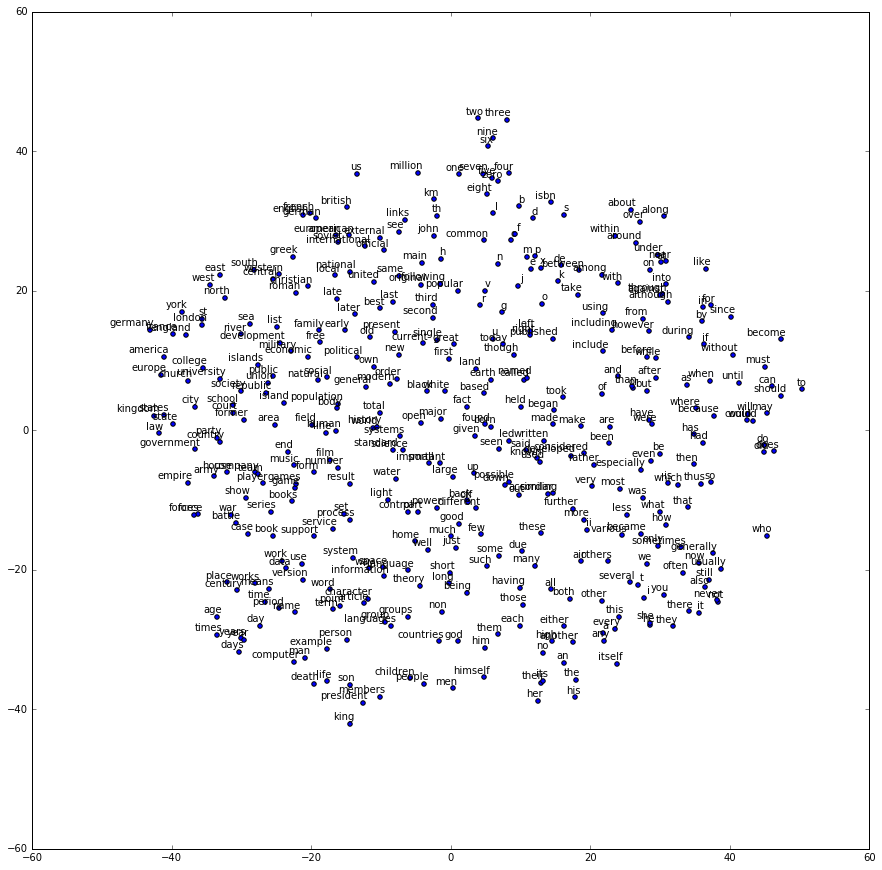

In [9]:
def plot(embeddings, labels):
  assert embeddings.shape[0] >= len(labels), 'More labels than embeddings'
  pylab.figure(figsize=(15,15))  # in inches
  for i, label in enumerate(labels):
    x, y = embeddings[i,:]
    pylab.scatter(x, y)
    pylab.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points',
                   ha='right', va='bottom')
  pylab.show()

words = [reverse_dictionary[i] for i in range(1, num_points+1)]
plot(two_d_embeddings, words)

---

Problem
-------

An alternative to skip-gram is another Word2Vec model called [CBOW](http://arxiv.org/abs/1301.3781) (Continuous Bag of Words). In the CBOW model, instead of predicting a context word from a word vector, you predict a word from the sum of all the word vectors in its context. Implement and evaluate a CBOW model trained on the text8 dataset.

---

# 참고자료 
* [1] Vector Representations of Words -  https://www.tensorflow.org/versions/r0.7/tutorials/word2vec/index.html#vector-representations-of-words
* [2] Assignment 5: Word2Vec and CBOW - https://github.com/tensorflow/tensorflow/blob/master/tensorflow/examples/udacity/5_word2vec.ipynb